# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import statsmodelings as sm
# import seaborn as sns
import numpy as np
import scipy.stats as stats

In [ ]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv')
schema = pd.read_csv('schema.csv')

In [23]:
list(schema['Column'])

['GenderSelect',
 'GenderFreeForm',
 'Country',
 'Age',
 'EmploymentStatus',
 'StudentStatus',
 'LearningDataScience',
 'KaggleMotivationFreeForm',
 'CodeWriter',
 'CareerSwitcher',
 'CurrentJobTitleSelect',
 'CurrentJobTitleFreeForm',
 'TitleFit',
 'CurrentEmployerType',
 'MLToolNextYearSelect',
 'MLToolNextYearFreeForm',
 'MLMethodNextYearSelect',
 'MLMethodNextYearFreeForm',
 'LanguageRecommendationSelect',
 'LanguageRecommendationFreeForm',
 'PublicDatasetsSelect',
 'PublicDatasetsFreeForm',
 'PersonalProjectsChallengeFreeForm',
 'LearningPlatformSelect',
 'LearningPlatformCommunityFreeForm',
 'LearningPlatformFreeForm1',
 'LearningPlatformFreeForm2',
 'LearningPlatformFreeForm3',
 'LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',

In [ ]:
imp_colums = ['GenderSelect','GenderFreeForm',
 'Country',
 'Age',
 'EmploymentStatus',
 'StudentStatus','LearningDataScience',
 'KaggleMotivationFreeForm',
 'CodeWriter',
 'CareerSwitcher',
 'CurrentJobTitleSelect',
 'CurrentJobTitleFreeForm',
 'TitleFit',
 'CurrentEmployerType', 'PublicDatasetsSelect',
 'PublicDatasetsFreeForm','LearningPlatformSelect','BlogsPodcastsNewslettersSelect',
 'BlogsPodcastsNewslettersFreeForm','LearningDataScienceTime', 'JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations',]

In [33]:
df['AdjustedCompensation']

0             NaN
1             NaN
2             NaN
3        250000.0
4             NaN
           ...   
26389         NaN
26390         NaN
26391         NaN
26392         NaN
26393         NaN
Name: AdjustedCompensation, Length: 26394, dtype: float64

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [40]:
import flatiron_stats as fs
import seaborn as sns

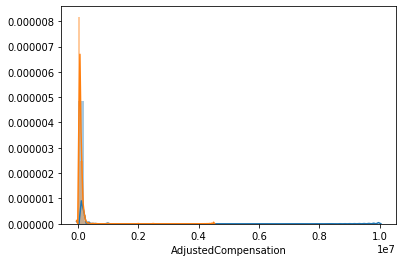

In [46]:
f= 'FormalEducation'
c = 'AdjustedCompensation'
subset = df[(~df[f].isnull()) & (~df[c].isnull())]

fs1 = subset[subset[f] == "Bachelor's degree"][c]
cs2 = subset[subset[f] == "Master's degree"][c]

sns.distplot(fs1)
sns.distplot(cs2)

In [48]:
print('Comparison of {} for {} and {}'.format(c, 'Bachelor', 'Master'))
print("Median Values: \ts1: {} \ts2: {}".format(round(fs1.median(),2), round(cs2.median(),2)))
print("Mean Values: \ts1: {} \ts2: {}".format(round(fs1.mean(),2), round(cs2.mean(),2)))
print('Sample sizes: \ts1: {} \ts2: {}'.format(len(fs1), len(cs2)))
print("Welch's t-test p-value:", fs.p_value_welch_ttest(fs1, cs2))
print("Welch's t-test p-value:", stats.ttest_ind(fs1, cs2, equal_var=False,
                                                 nan_policy='omit'))

Comparison of AdjustedCompensation for Bachelor and Master
Median Values: 	s1: 38399.4 	s2: 53812.17
Mean Values: 	s1: 64887.1 	s2: 69139.9
Sample sizes: 	s1: 1107 	s2: 1990
Welch's t-test p-value: 0.33077639451272445
Welch's t-test p-value: Ttest_indResult(statistic=-0.43786693335411514, pvalue=0.6615527890254489)


In [50]:
print('Repeated Test with Outliers Removed:')
print('S1: {}\tS2: {}'.format("Bachelor's degree", "Master's degree"))
outlier_threshold = 270000
s1 = subset[(subset[f]=="Bachelor's degree") & (subset[c]<=outlier_threshold)][c]
s2 = subset[(subset[f]=="Master's degree") & (subset[c]<=outlier_threshold)][c]
print("Median Values: \ts1: {} \ts2: {}".format(round(s1.median(),2), round(s2.median(),2)))
print("Mean Values: \ts1: {} \ts2: {}".format(round(s1.mean(),2), round(s2.mean(),2)))
print('Sample sizes: \ts1: {} \ts2: {}'.format(len(s1), len(s2)))
print("Welch's t-test p-value with outliers removed:", fs.p_value_welch_ttest(s1, s2))

Repeated Test with Outliers Removed:
S1: Bachelor's degree	S2: Master's degree
Median Values: 	s1: 37488.0 	s2: 52616.34
Mean Values: 	s1: 51742.21 	s2: 62296.33
Sample sizes: 	s1: 1096 	s2: 1973
Welch's t-test p-value with outliers removed: 1.0613307233064972e-08


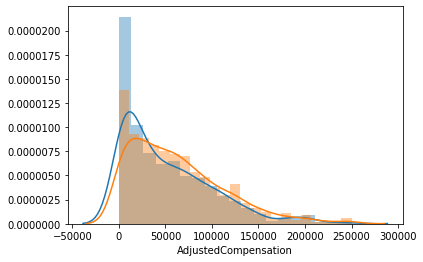

In [51]:
sns.distplot(s1)
sns.distplot(s2)

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [52]:
f1 = 'FormalEducation'
f2 = 'AdjustedCompensation'
subset = df[(~df[f1].isnull()) & (~df[f2].isnull())]
s1 = subset[subset[f1]=="Doctoral degree"][f2]
s2 = subset[subset[f1]=="Bachelor's degree"][f2]
print('Analyses of {} comparing {} and {}'.format(f2, "Doctoral degree", "Bachelor's degree"))
print("Median Values: \ns1:{} s2:{}".format(round(s1.median(),2), round(s2.median(),2)))
print('Sample sizes: \ns1: {} s2: {}'.format(len(s1), len(s2)))
print("Welch's t-test p-value:", fs.p_value_welch_ttest(s1, s2))

print('\n\nRepeated Test with Ouliers Removed:')
outlier_threshold = 300000
s1 = subset[(subset[f1]=="Doctoral degree") & (subset[f2]<=outlier_threshold)][f2]
s2 = subset[(subset[f1]=="Bachelor's degree") & (subset[f2]<=outlier_threshold)][f2]
print('Sample sizes: \ns1: {} \ns2: {}'.format(len(s1), len(s2)))
print("Welch's t-test p-value with outliers removed:", fs.p_value_welch_ttest(s1, s2))

Analyses of AdjustedCompensation comparing Doctoral degree and Bachelor's degree
Median Values: 
s1:74131.92 s2:38399.4
Sample sizes: 
s1: 967 s2: 1107
Welch's t-test p-value: 0.15682381994720251


Repeated Test with Ouliers Removed:
Sample sizes: 
s1: 954 
s2: 1097
Welch's t-test p-value with outliers removed: 0.0


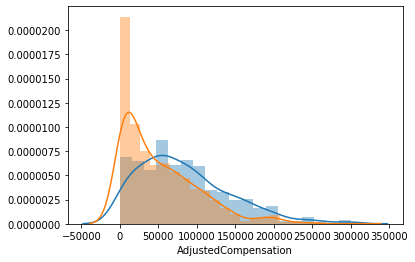

In [53]:
sns.distplot(s1)
sns.distplot(s2)

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = '{} ~ C({})'.format(f2, f1)
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!